In [8]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 80

import numpy as np
import matplotlib.pyplot as plt

# Polynomial Features

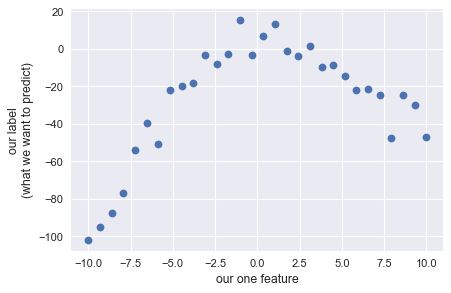

In [12]:
# Create data

X = np.linspace(-10,10,30)
y = -0.8 * X * X + 2 * X + 3 + 8*np.random.randn(X.shape[0])

plt.xlabel('our one feature')
plt.ylabel('our label\n(what we want to predict)')
plt.plot(X, y, 'o');

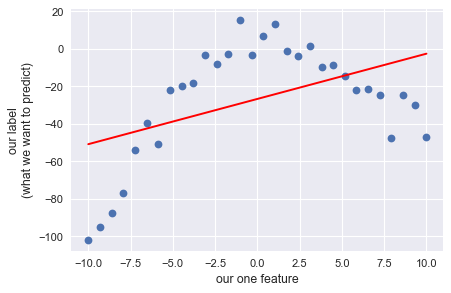

In [14]:
# Fit data using LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)
y_pred = lr.predict(X.reshape(-1,1))

plt.xlabel('our one feature')
plt.ylabel('our label\n(what we want to predict)')
plt.plot(X, y, 'o')
plt.plot(X, y_pred, c='red');

In [16]:
from sklearn.metrics import r2_score
print("R^2 score:", r2_score(y, y_pred))

R^2 score: 0.22046302491685177


In [20]:
# Add features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [21]:
pf = PolynomialFeatures(degree=2)

In [23]:
X_trans = pf.fit_transform(X.reshape(-1,1))

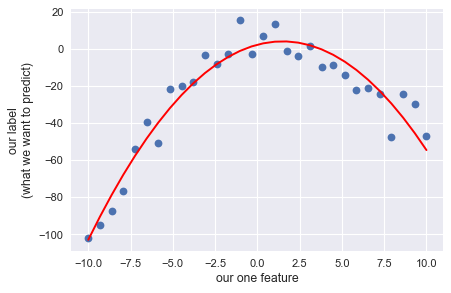

In [29]:
poly_model = Pipeline([
    ('transformer', PolynomialFeatures(degree=2)),
    ('predictor', LinearRegression())
])

poly_model.fit(X.reshape(-1,1), y)

y_pred = poly_model.predict(X.reshape(-1,1))

plt.xlabel('our one feature')
plt.ylabel('our label\n(what we want to predict)')
plt.plot(X, y, 'o')
plt.plot(X, y_pred, c='red');

In [30]:
print("R^2 score:", r2_score(y, y_pred))

R^2 score: 0.9227883610501437


In [31]:
poly_model.named_steps['predictor'].intercept_

2.102050220785234

In [37]:
X_trans[:5,1:]

array([[-10.        , 100.        ],
       [ -9.31034483,  86.68252081],
       [ -8.62068966,  74.31629013],
       [ -7.93103448,  62.90130797],
       [ -7.24137931,  52.43757432]])

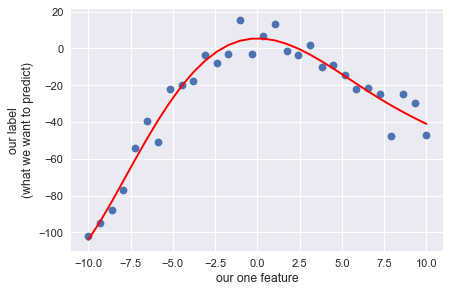

In [49]:
# Higher powers
poly_model = Pipeline([
    ('transformer', PolynomialFeatures(degree=5)),
    ('predictor', LinearRegression())
])

poly_model.fit(X.reshape(-1,1), y)

y_pred = poly_model.predict(X.reshape(-1,1))

plt.xlabel('our one feature')
plt.ylabel('our label\n(what we want to predict)')
plt.plot(X, y, 'o')
plt.plot(X, y_pred, c='red');

In [50]:
poly_model.named_steps.predictor.coef_

array([ 0.00000000e+00,  4.37993596e-02, -1.12203894e+00,  5.62794190e-02,
        3.41968493e-03, -2.52189869e-04])

In [44]:
print("R^2 score:", r2_score(y, y_pred))

R^2 score: 0.9644739258250808
